Problem Statement: Healthcare Department of US wanted to predict the Energy in Kcal in packaged food products with respect to the food contents and its nutritional values. Received data contains all kinds packaged food products available in US and provides description of their nutritions. Target Column - Energ_Kcal

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Nutritions_US.csv', encoding= 'unicode_escape')
df.head()

,NDB_No,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Energ_Kcal
0,1001,"BUTTER,WITH SALT",15.87,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,717
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,718
2,1003,"BUTTER OIL,ANHYDROUS",0.24,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,876
3,1004,"CHEESE,BLUE",42.41,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,353
4,1005,"CHEESE,BRICK",41.11,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",371


In [3]:
df.shape

(8790, 52)

In [4]:
df.describe() # This helps to get an idea of the count , range, mean, distribution

,NDB_No,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Energ_Kcal
count,8790.000000,8789.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,8442.000000,8646.000000,...,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8790.000000
mean,15663.495222,54.112218,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,76.738214,2.699674,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,226.317634
std,9251.413586,30.772854,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,203.527453,5.687560,...,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,169.877539
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000
25%,9086.250000,29.700000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,10.000000,0.540000,...,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,91.000000
50%,14427.500000,63.080000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,21.000000,1.380000,...,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,191.000000
75%,20142.750000,77.960000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,69.000000,2.600000,...,0.200000,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,337.000000
max,93600.000000,100.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,7364.000000,123.600000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,902.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8789 non-null   float64
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [6]:
# converting miligrams to kg 
df[['Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 
    'Potassium_(mg)', 'Sodium_(mg)','Zinc_(mg)','Copper_mg)', 'Manganese_(mg)', 
    'Vit_C_(mg)','Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 
    'Vit_B6_(mg)','Vit_E_(mg)','Cholestrl_(mg)']].mul(0.000001)

,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Vit_E_(mg),Cholestrl_(mg)
0,0.000024,2.000000e-08,0.000002,0.000024,0.000024,0.000643,9.000000e-08,0.000000e+00,0.000000e+00,0.0,5.000000e-09,3.400000e-08,4.200000e-08,1.100000e-07,3.000000e-09,2.320000e-06,0.000215
1,0.000023,5.000000e-08,0.000001,0.000024,0.000041,0.000583,5.000000e-08,1.000000e-08,1.000000e-09,0.0,7.000000e-09,6.400000e-08,2.200000e-08,9.700000e-08,8.000000e-09,1.370000e-06,0.000225
2,0.000004,0.000000e+00,0.000000,0.000003,0.000005,0.000002,1.000000e-08,1.000000e-09,0.000000e+00,0.0,1.000000e-09,5.000000e-09,3.000000e-09,1.000000e-08,1.000000e-09,2.800000e-06,0.000256
3,0.000528,3.100000e-07,0.000023,0.000387,0.000256,0.001146,2.660000e-06,4.000000e-08,9.000000e-09,0.0,2.900000e-08,3.820000e-07,1.016000e-06,1.729000e-06,1.660000e-07,2.500000e-07,0.000075
4,0.000674,4.300000e-07,0.000024,0.000451,0.000136,0.000560,2.600000e-06,2.400000e-08,1.200000e-08,0.0,1.400000e-08,3.510000e-07,1.180000e-07,2.880000e-07,6.500000e-08,2.600000e-07,0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,0.000066,1.400000e-06,0.000060,0.000254,0.000520,0.004450,1.100000e-06,1.000000e-07,NaN,0.0,2.000000e-08,1.900000e-07,3.300000e-06,NaN,4.100000e-07,2.380000e-06,0.000095
8786,0.000010,5.800000e-07,0.000037,0.000426,0.000314,0.000667,1.550000e-06,3.300000e-08,2.900000e-08,0.0,1.200000e-08,2.400000e-08,1.076000e-06,3.660000e-07,1.120000e-07,0.000000e+00,0.000041
8787,0.000013,3.600000e-06,0.000010,0.000008,0.000063,0.000058,1.900000e-07,2.000000e-08,NaN,0.0,1.300000e-07,6.000000e-08,1.000000e-07,NaN,0.000000e+00,0.000000e+00,0.000000
8788,0.000010,3.500000e-06,0.000250,0.000272,0.000382,0.000070,1.000000e-06,4.000000e-07,NaN,0.0,1.000000e-08,1.200000e-07,1.400000e-06,NaN,1.300000e-07,5.000000e-06,0.000050


In [7]:
# converting 3/4th g to Kg 
df[['Folate_Tot_(¾g)', 'Food_Folate_(¾g)', 'Folate_DFE_(¾g)', 'Vit_B12_(¾g)', 
    'Retinol_(¾g)', 'Alpha_Carot_(¾g)','Beta_Carot_(¾g)','Beta_Crypt_(¾g)', 'Lycopene_(¾g)', 
    'Lut+Zea_ (¾g)','Vit_D_¾g', 'Vit_K_(¾g)']].mul(0.00075)

,Folate_Tot_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Vit_B12_(¾g),Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_D_¾g,Vit_K_(¾g)
0,0.00225,0.00225,0.00225,0.000128,0.50325,0.00000,0.11850,0.0000,0.0,0.00000,0.000000,0.005250
1,0.00300,0.00300,0.00300,0.000053,0.50325,0.00075,0.10125,0.0045,0.0,0.00975,0.000000,0.003450
2,0.00000,0.00000,0.00000,0.000008,0.61800,0.00000,0.14475,0.0000,0.0,0.00000,0.000000,0.006450
3,0.02700,0.02700,0.02700,0.000915,0.14400,0.00000,0.05550,0.0000,0.0,0.00000,0.000375,0.001800
4,0.01500,0.01500,0.01500,0.000945,0.21450,0.00000,0.05700,0.0000,0.0,0.00000,0.000375,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,0.01125,0.01125,0.01125,0.009000,0.03525,0.00000,0.00000,0.0000,0.0,0.00000,0.018900,0.005850
8786,0.01500,0.01500,0.01500,0.001613,0.00150,0.00000,0.00000,0.0000,0.0,0.00000,0.000000,0.000000
8787,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.000000,0.000000
8788,0.00450,0.00450,0.00450,0.000375,0.02250,0.00000,0.00000,0.0000,0.0,0.00000,0.000000,0.000075


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8789 non-null   float64
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [9]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'NDB_No'}>,
        <AxesSubplot:title={'center':'Water_(g)'}>,
        <AxesSubplot:title={'center':'Protein_(g)'}>,
        <AxesSubplot:title={'center':'Lipid_Tot_(g)'}>,
        <AxesSubplot:title={'center':'Ash_(g)'}>,
        <AxesSubplot:title={'center':'Carbohydrt_(g)'}>,
        <AxesSubplot:title={'center':'Fiber_TD_(g)'}>],
       [<AxesSubplot:title={'center':'Sugar_Tot_(g)'}>,
        <AxesSubplot:title={'center':'Calcium_(mg)'}>,
        <AxesSubplot:title={'center':'Iron_(mg)'}>,
        <AxesSubplot:title={'center':'Magnesium_(mg)'}>,
        <AxesSubplot:title={'center':'Phosphorus_(mg)'}>,
        <AxesSubplot:title={'center':'Potassium_(mg)'}>,
        <AxesSubplot:title={'center':'Sodium_(mg)'}>],
       [<AxesSubplot:title={'center':'Zinc_(mg)'}>,
        <AxesSubplot:title={'center':'Copper_mg)'}>,
        <AxesSubplot:title={'center':'Manganese_(mg)'}>,
        <AxesSubplot:title={'center':'Selenium_(¾g)'}>,
        <AxesSubpl

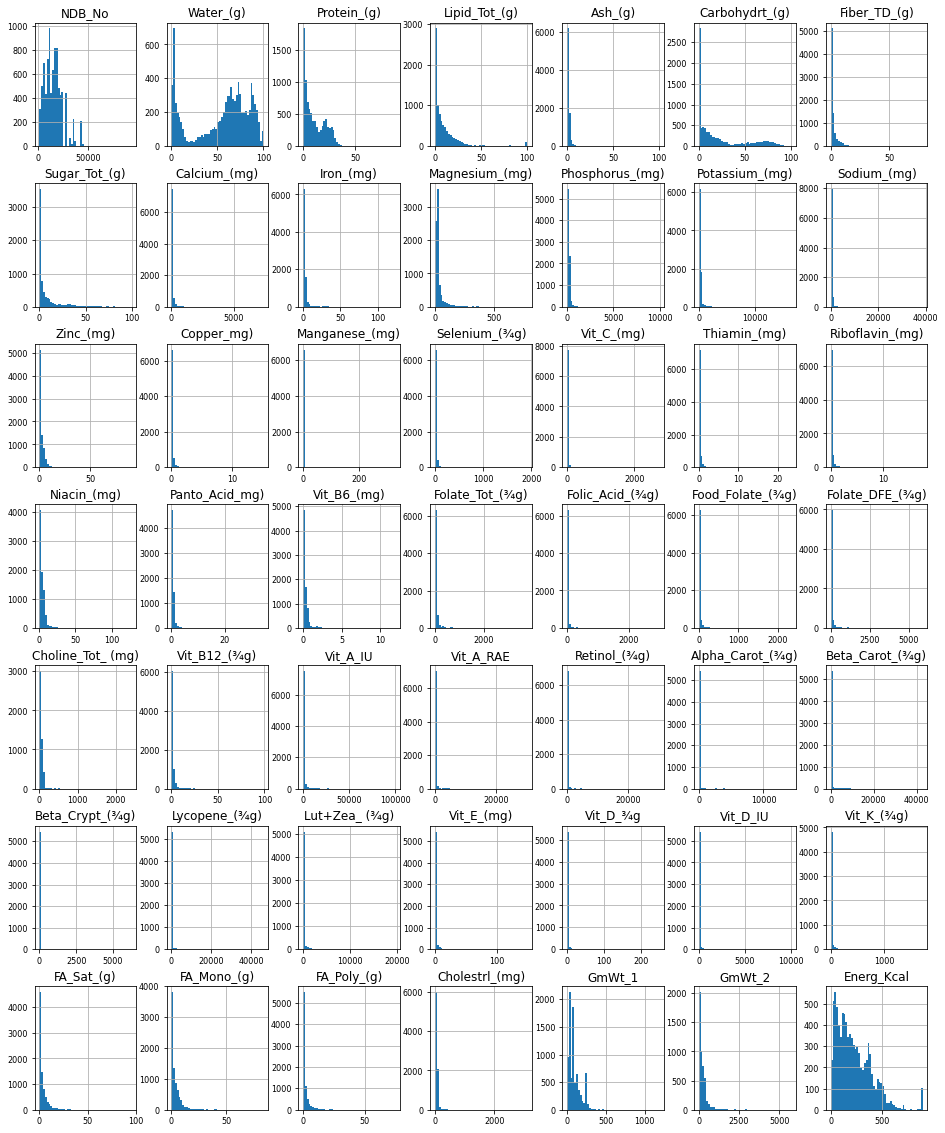

In [10]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

NDB_No                0.000000
Shrt_Desc             0.000000
Water_(g)             0.011377
Protein_(g)           0.000000
Lipid_Tot_(g)         0.000000
Ash_(g)               3.697383
Carbohydrt_(g)        0.000000
Fiber_TD_(g)          6.757679
Sugar_Tot_(g)        20.841866
Calcium_(mg)          3.959044
Iron_(mg)             1.638225
Magnesium_(mg)        8.407281
Phosphorus_(mg)       6.587031
Potassium_(mg)        4.846416
Sodium_(mg)           0.944255
Zinc_(mg)             8.031854
Copper_mg)           14.300341
Manganese_(mg)       24.573379
Selenium_(¾g)        19.340159
Vit_C_(mg)            9.306030
Thiamin_(mg)          7.212742
Riboflavin_(mg)       7.007964
Niacin_(mg)           7.246871
Panto_Acid_mg)       25.506257
Vit_B6_(mg)          10.295791
Folate_Tot_(¾g)      14.345848
Folic_Acid_(¾g)      23.196815
Food_Folate_(¾g)     20.113766
Folate_DFE_(¾g)      23.401593
Choline_Tot_ (mg)    45.688282
Vit_B12_(¾g)         13.572241
Vit_A_IU              8.088737
Vit_A_RA

In [12]:
# In above case, I'm taking max thresold as 40%.
# Features who have more than 40% null values should be dropped
# Feature names : Choline_Tot_ (mg), Vit_K_(¾g), GmWt_2 , GmWt_Desc2 

In [13]:
df.drop(['Choline_Tot_ (mg)', 'Vit_K_(¾g)', 'GmWt_2','GmWt_Desc2'], inplace=True, axis=1)
df.head()

,NDB_No,Shrt_Desc,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_E_(mg),Vit_D_¾g,Vit_D_IU,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,Energ_Kcal
0,1001,"BUTTER,WITH SALT",15.87,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,2.32,0.0,0.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",717
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,1.37,0.0,0.0,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",718
2,1003,"BUTTER OIL,ANHYDROUS",0.24,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,2.80,0.0,0.0,61.924,28.732,3.694,256.0,12.80,1 tbsp,876
3,1004,"CHEESE,BLUE",42.41,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,0.25,0.5,21.0,18.669,7.778,0.800,75.0,28.35,1 oz,353
4,1005,"CHEESE,BRICK",41.11,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,0.26,0.5,22.0,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",371


In [14]:
#Categorical columns
df.drop(['NDB_No','Shrt_Desc','GmWt_Desc1'], inplace=True, axis=1)
df.head()

,Water_(g),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),...,Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,Energ_Kcal
0,15.87,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,...,0.0,2.32,0.0,0.0,51.368,21.021,3.043,215.0,5.00,717
1,16.72,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,...,13.0,1.37,0.0,0.0,45.390,19.874,3.331,225.0,3.80,718
2,0.24,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,...,0.0,2.80,0.0,0.0,61.924,28.732,3.694,256.0,12.80,876
3,42.41,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,...,0.0,0.25,0.5,21.0,18.669,7.778,0.800,75.0,28.35,353
4,41.11,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,...,0.0,0.26,0.5,22.0,18.764,8.598,0.784,94.0,132.00,371


Outlier check with IQR

An outlier is an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism. (Unusual / Extreme values)

In [15]:
def out1(x):
    Q1 = np.percentile(x,25)
    Q3 = np.percentile(x,75)
    IQR = Q3 - Q1
    LL = Q3 + 1.5*IQR # Lower limit 
    UL = Q1 - 1.5*IQR # Upper limit
    out = [1 if (a >= UL) | (a <= LL) else 0 for a in x]
    return(sum(out))
# check #outliers in each variable
df.apply(out1)

Water_(g)              0
Protein_(g)         8790
Lipid_Tot_(g)       8790
Ash_(g)                0
Carbohydrt_(g)      8790
Fiber_TD_(g)           0
Sugar_Tot_(g)          0
Calcium_(mg)           0
Iron_(mg)              0
Magnesium_(mg)         0
Phosphorus_(mg)        0
Potassium_(mg)         0
Sodium_(mg)            0
Zinc_(mg)              0
Copper_mg)             0
Manganese_(mg)         0
Selenium_(¾g)          0
Vit_C_(mg)             0
Thiamin_(mg)           0
Riboflavin_(mg)        0
Niacin_(mg)            0
Panto_Acid_mg)         0
Vit_B6_(mg)            0
Folate_Tot_(¾g)        0
Folic_Acid_(¾g)        0
Food_Folate_(¾g)       0
Folate_DFE_(¾g)        0
Vit_B12_(¾g)           0
Vit_A_IU               0
Vit_A_RAE              0
Retinol_(¾g)           0
Alpha_Carot_(¾g)       0
Beta_Carot_(¾g)        0
Beta_Crypt_(¾g)        0
Lycopene_(¾g)          0
Lut+Zea_ (¾g)          0
Vit_E_(mg)             0
Vit_D_¾g               0
Vit_D_IU               0
FA_Sat_(g)             0


In [17]:
#We can observe that Protein_(g), Lipid_Tot_(g) and Carbohydrt_(g) have outliners and that should be treated

In [18]:
def box_index(ser):
    Q1 = np.percentile(ser,25)
    Q3 = np.percentile(ser,75)
    IQR = Q3 - Q1
    
    print('High value outlier index: ',ser[ser > (Q3 + 1.5*IQR)].index)
    print('Low value outlier index: ',ser[ser < (Q1 - 1.5*IQR)].index)
    print('total outliers : ' + str(len(ser[ser > (Q3 + 1.5*IQR)].index) + len(ser[ser < (Q1 - 1.5*IQR)].index)))
    
box_index(df['Protein_(g)'])

High value outlier index:  Int64Index([ 121,  122,  123,  124,  130,  151,  191,  216, 3305, 3611, 3612,
            3623, 3630, 4144, 4146, 4163, 4171, 4172, 4481, 4499, 4655, 4836,
            4853, 4854, 4855, 4857, 4858, 4864, 5008, 5009, 5014, 6081, 6204,
            6358, 6388, 6389, 8292, 8314, 8327, 8347, 8390, 8391, 8394, 8400,
            8404, 8409, 8413, 8418, 8783],
           dtype='int64')
Low value outlier index:  Int64Index([], dtype='int64')
total outliers : 49


In [19]:
def box_index(ser):
    Q1 = np.percentile(ser,25)
    Q3 = np.percentile(ser,75)
    IQR = Q3 - Q1
    
    print('High value outlier index: ',ser[ser > (Q3 + 1.5*IQR)].index)
    print('Low value outlier index: ',ser[ser < (Q1 - 1.5*IQR)].index)
    print('total outliers : ' + str(len(ser[ser > (Q3 + 1.5*IQR)].index) + len(ser[ser < (Q1 - 1.5*IQR)].index)))
    
box_index(df['Lipid_Tot_(g)'])

High value outlier index:  Int64Index([   0,    1,    2,    8,   16,   51,   62,   63,  121,  122,
            ...
            8640, 8641, 8642, 8653, 8699, 8707, 8720, 8740, 8770, 8771],
           dtype='int64', length=492)
Low value outlier index:  Int64Index([], dtype='int64')
total outliers : 492


In [20]:
def box_index(ser):
    Q1 = np.percentile(ser,25)
    Q3 = np.percentile(ser,75)
    IQR = Q3 - Q1
    
    print('High value outlier index: ',ser[ser > (Q3 + 1.5*IQR)].index)
    print('Low value outlier index: ',ser[ser < (Q1 - 1.5*IQR)].index)
    print('total outliers : ' + str(len(ser[ser > (Q3 + 1.5*IQR)].index) + len(ser[ser < (Q1 - 1.5*IQR)].index)))
    
box_index(df['Carbohydrt_(g)'])

High value outlier index:  Int64Index([1776, 1782, 1792, 1794, 1814, 1816, 1817, 1818, 1819, 1825,
            ...
            8562, 8650, 8651, 8652, 8654, 8676, 8679, 8681, 8710, 8760],
           dtype='int64', length=110)
Low value outlier index:  Int64Index([], dtype='int64')
total outliers : 110


<AxesSubplot:ylabel='Protein_(g)'>

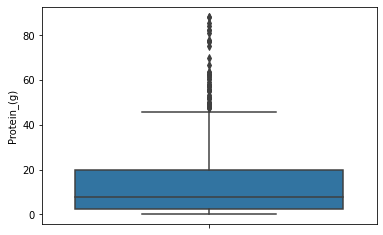

In [21]:
#Before handling outliners
sns.boxplot(y=df['Protein_(g)'])


<AxesSubplot:ylabel='Lipid_Tot_(g)'>

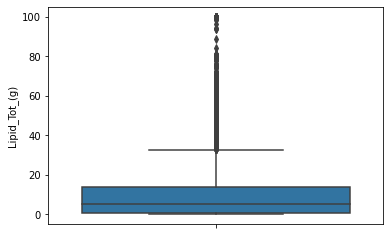

In [22]:
sns.boxplot(y=df['Lipid_Tot_(g)'])


<AxesSubplot:ylabel='Carbohydrt_(g)'>

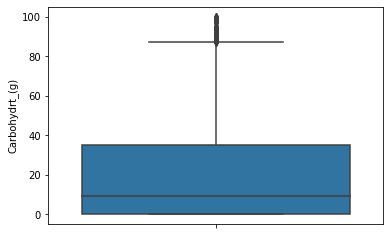

In [23]:
sns.boxplot(y=df['Carbohydrt_(g)'])

In [24]:
#max values of these columns before treating outliners
print(df['Protein_(g)'].max())
print(df['Lipid_Tot_(g)'].max())
print(df['Carbohydrt_(g)'].max())

88.32
100.0
100.0


In [25]:
Q1 = np.percentile(df['Protein_(g)'],25)
Q3 = np.percentile(df['Protein_(g)'],75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR 
LL = Q1 - 1.5*IQR 
print(LL,UL)
df['Protein_(g)'].values[df['Protein_(g)'] > UL] = UL
df['Protein_(g)'].values[df['Protein_(g)'] < LL] = LL

-23.87 46.129999999999995


In [26]:
Q1 = np.percentile(df['Lipid_Tot_(g)'],25)
Q3 = np.percentile(df['Lipid_Tot_(g)'],75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR 
LL = Q1 - 1.5*IQR 
print(LL,UL)
df['Lipid_Tot_(g)'].values[df['Lipid_Tot_(g)'] > UL] = UL
df['Lipid_Tot_(g)'].values[df['Lipid_Tot_(g)'] < LL] = LL

-18.205000000000002 32.875


In [27]:
Q1 = np.percentile(df['Carbohydrt_(g)'],25)
Q3 = np.percentile(df['Carbohydrt_(g)'],75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR 
LL = Q1 - 1.5*IQR 
print(LL,UL)
df['Carbohydrt_(g)'].values[df['Carbohydrt_(g)'] > UL] = UL
df['Carbohydrt_(g)'].values[df['Carbohydrt_(g)'] < LL] = LL

-52.24 87.19999999999999


<AxesSubplot:ylabel='Protein_(g)'>

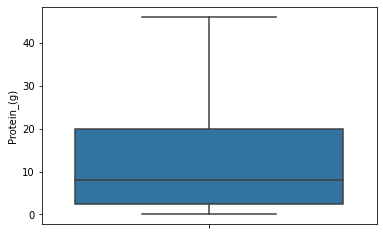

In [28]:
#After handling outliners
sns.boxplot(y=df['Protein_(g)'])


<AxesSubplot:ylabel='Lipid_Tot_(g)'>

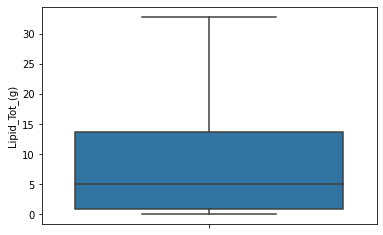

In [29]:
sns.boxplot(y=df['Lipid_Tot_(g)'])


<AxesSubplot:ylabel='Carbohydrt_(g)'>

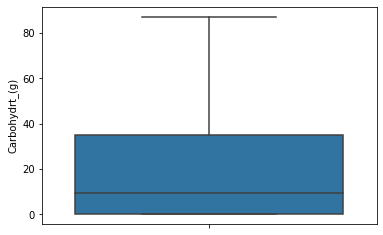

In [30]:
sns.boxplot(y=df['Carbohydrt_(g)'])

In [31]:
#max values of these columns after treating outliners
print(df['Protein_(g)'].max())
print(df['Lipid_Tot_(g)'].max())
print(df['Carbohydrt_(g)'].max())

46.129999999999995
32.875
87.19999999999999


In [ ]:
# We can observe that the outliners were over the max value of IQR, and now the max values of those columns with outliners are decresed.